<h1 style="text-align:center">Mass-Spring-Damper Example</h1>
<h3 style="text-align:center">MCHE 513: Intermediate Dynamics</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In this example, we'll determine the equations of motion for the simple mass-spring-damper system shown in Figure 1. The system consists of two masses, $m_1$ and $m_2$, connected by spring, $k$, and damper, $c$. There is a force on the first mass, $f$. The position of first mass is represented by $x_1$, and the second mass by $x_2$.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/TwoMassSpringDamper_Forced.png" alt="Forces Two-Mass-Spring-Damper" width=50%><br>
    <strong>Figure 1: Forced Two-Mass-Spring-Damper</strong>
</p>

In [1]:
# Import the SymPy Module
import sympy

# Import the necessary sub-modules for dynamics
from sympy.physics.mechanics import LagrangesMethod, Lagrangian
from sympy.physics.mechanics import ReferenceFrame, Particle, Point
from sympy.physics.mechanics import dynamicsymbols

# initiate better printing of SymPy results
sympy.init_printing()

First, we need to define the generalized coordinates. We'll treat the two masses as point masses, and identify them as such to SymPy. We also need to identify the other symbols in the problem, the two masses, $m_1$ and $m_2$, the spring constant, $k$, damping coefficient, $c$, and force, $f$.

In [2]:
x1, x2, f = dynamicsymbols('x_1 x_2 f')

# Also define the first derivatives of each
x1_dot, x2_dot, f_dot = dynamicsymbols('x_1 x_2 f', 1)

# Define the symbols for the other paramters
mass1, mass2, k, c = sympy.symbols('m_1 m_2 k c', isPostive = True)

In [3]:
# Define the reference frame
N = ReferenceFrame('N')

#Define a world coordinate origin
O = Point('O')
O.set_vel(N, 0)

# Define the two points and set their velocities
# m1p = Point('m1p')
m1p = O.locatenew('m1p', x1 * N.x)
m1p.set_vel(N, x1_dot * N.x)

# m2p = Point('m2p')
m2p = O.locatenew('m2p', x2 * N.x)
m2p.set_vel(N, x2_dot * N.x)

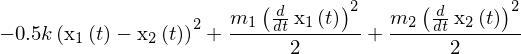

In [4]:
m1 = Particle('m1', m1p, mass1)
m2 = Particle('m2', m2p, mass2)

# Set up the force list - each item follows the form:
#    (the location where the force is applied, its magnitude and direction)
forces = [(m1p, f * N.x + c * (x2_dot - x1_dot) * N.x), # damping and external force on m1
          (m2p, -c * (x2_dot - x1_dot) * N.x)]          # damping on m2

# Define the potential energy for the spring
m1.potential_energy = 1 / 2 * k * (x1 - x2)**2

# Form the Lagrangian, then simplify and printd
L = Lagrangian(N, m1, m2)
L.simplify()

In [5]:
LM = LagrangesMethod(L, [x1, x2], forcelist = forces, frame = N)

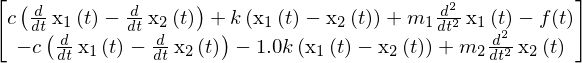

In [6]:
sympy.simplify(LM.form_lagranges_equations())

The <tt>LagrangesMethod</tt> class gives us lots of information about the system. For example, we can output the mass/inertia matrix and the forcing terms. Note that the forcing terms include what might be conservative forces and would therefore normally appear in a stiffness matrix.

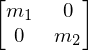

In [10]:
# Output the inertia/mass matrix of the system
LM.mass_matrix

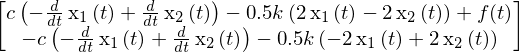

In [11]:
# Output the forcing terms of the system
LM.forcing

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [13]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))